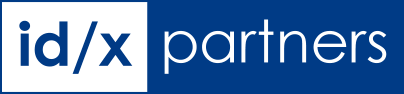

<h1><center>LOAN CREDIT RISK PREDICTION</center></h1>

<h2><center>Author: Rania Virda Sukmaningsih</center></h2>

# DATASET & BUSINESS UNDERSTANDING

## Dataset Information

dataset ini berisi informasi peminjaman kredit dari lending company yaitu [LendingClub](https://www.lendingclub.com/) from 2007 to 2014.

## Attribute Information

### Identifier

`id` and `member_id`is unique LC ID that each of which is an ID for loan listing and ID for the loaner member

### Target

`loan_status` has several values, such as:
   * `Current` means current payments
   * `Charged Off` means the payment is in default so that it is written off
   * `Late` means late payment is made
   * `In Grace Period` means in grace period
   * `Fully Paid` means payment in full
   * `Default` means payment is stuck

<br>
Later loan_status will be categorized as good loaner and bad loaner.

### Company Goals

* Accepting applicants who will be good loaner
* Declining applicants who will be a risky borrower or bad loaner

### Problems

Loan companies are faced with two major decisions that carry two types of risk regarding approval decisions:
1. Approving loans to applicants who are unlikely to repay their loans resulting in financial losses for the company 
2. Disapproving loans to applicants who are likely to repay the loan resulting in business losses

### Objectives

1. Predict whether the applicant is a good loaner or a bad loaner
2. Whats makes the borrower indicated a bad loaner

# IMPORT LIBRARY

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
import plotly.express as px

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

#Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

# DATA KNOWLEDGE

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. Lets look at features of data.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/idx/loan_data_2007_2014.csv")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 3 things that take my attention 1) There is Unnamed: 0, id, member_id that cannot be used for modelling 2) loan_status is our class label 3) There are so many null values in each features.<br><br>
Therefore, drop these unnecessary features and check total of data that contains null values in the next steps. However do not forget this is not a feature selection. 

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
list = ['Unnamed: 0','id','member_id']
df = df.drop(list,axis = 1 )

In [7]:
#df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

In [9]:
print('Data contains %.f rows and %.f columns' %(df.shape[0], df.shape[1]))

Data contains 466285 rows and 72 columns


In [10]:
print('This data contains %.f duplicated data' %df.duplicated().sum())

This data contains 0 duplicated data


**Lets check our target**

In [11]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

It can be seen that the `loan_status` variable has several values:

`Current` means current payments; `Charged Off` means the payment is in default so that it is written off; `Late` means late payment is made; `In Grace Period` means in grace period; `Fully Paid` means payment in full; `Default` means payment is stuck

From these definitions, each individual can be marked whether they are a `bad loaner` (bad borrower) or `good loaner` (good borrower).

Next, I will categorize loan_status into good loaners and bad loaners. I'm using a late payment of over 30 days and worse than that as a `bad loaner` marker. Beyond that, it is categorized as a `good loaner`.

In [12]:
df.loc[df['loan_status'] == 'Current', 'loan_status'] = 'good loaner'
df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = 'good loaner'
df.loc[df['loan_status'] == 'Charged Off', 'loan_status'] = 'bad loaner'
df.loc[df['loan_status'] == 'Late (31-120 days)', 'loan_status'] = 'bad loaner' 
df.loc[df['loan_status'] == 'In Grace Period', 'loan_status'] = 'bad loaner'
df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid' , 'loan_status'] = 'good loaner'
df.loc[df['loan_status'] == 'Late (16-30 days)' , 'loan_status'] = 'good loaner'
df.loc[df['loan_status'] == 'Default', 'loan_status'] = 'bad loaner'
df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off' , 'loan_status'] = 'bad loaner'

After flagging `bad/good loans`, it can be seen that the number of individuals marked as bad loans is much less than good loans. This causes this problem to become an imbalanced dataset problem. 

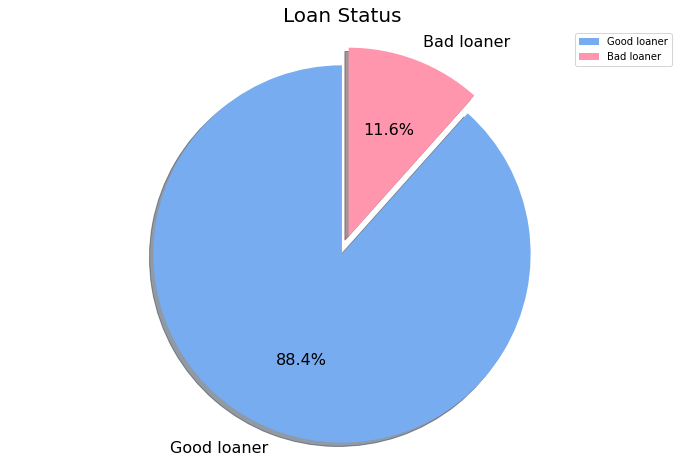

In [13]:
plt.figure(figsize=(12,8))
my_labels = 'Good loaner','Bad loaner'
my_colors = ['#77ACF1','#FF96AD']
my_explode = (0, 0.1)
plt.pie(df.loan_status.value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=90, shadow = True, colors=my_colors, explode=my_explode, textprops={'fontsize': 16})
plt.title('Loan Status', fontsize=20)
plt.axis('equal')
plt.legend()
plt.show()

**Who applies for credit?**

In [14]:
title_loan = " ".join(str(tujuan) for tujuan in df.emp_title)

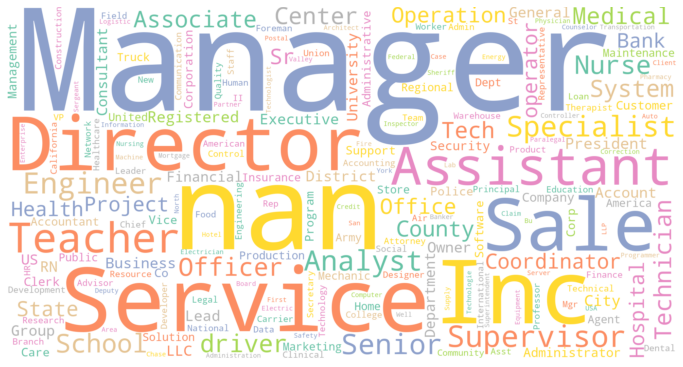

In [15]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080, colormap='Set2').generate(title_loan)

plt.figure(figsize = (12, 12))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

The one who applied for the most loans was the manager.

**Where are the borrowers domiciled?**

Text(0.5, 0, 'Proportion of Customers')

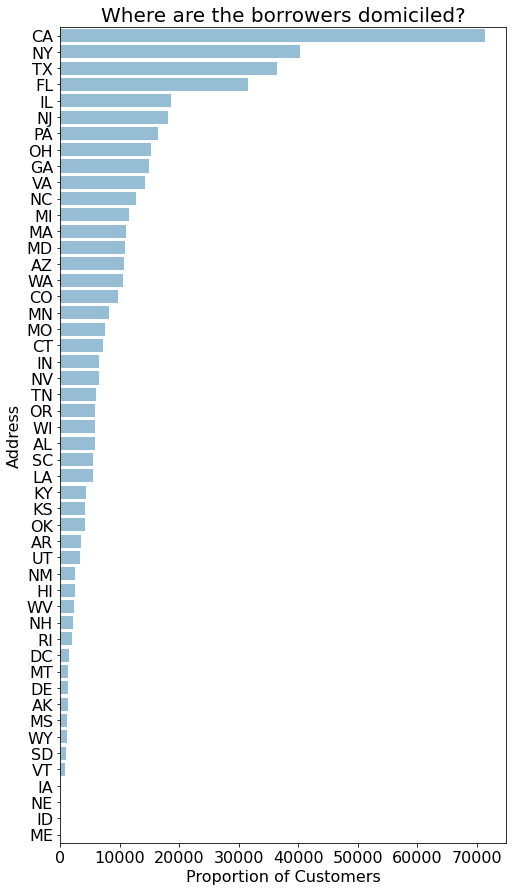

In [16]:
order = df['addr_state'].value_counts(ascending=False).index
plt.figure(figsize=(8,15))
ax = sns.countplot(y='addr_state', data=df, orient='v', order=order, color='#8CC0DE')
plt.title('Where are the borrowers domiciled?', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_ylabel("Address",fontsize=16)
ax.set_xlabel("Proportion of Customers",fontsize=16)

**Why did borrowers apply for loans?**

Text(0.5, 0, 'Proportion of Customers')

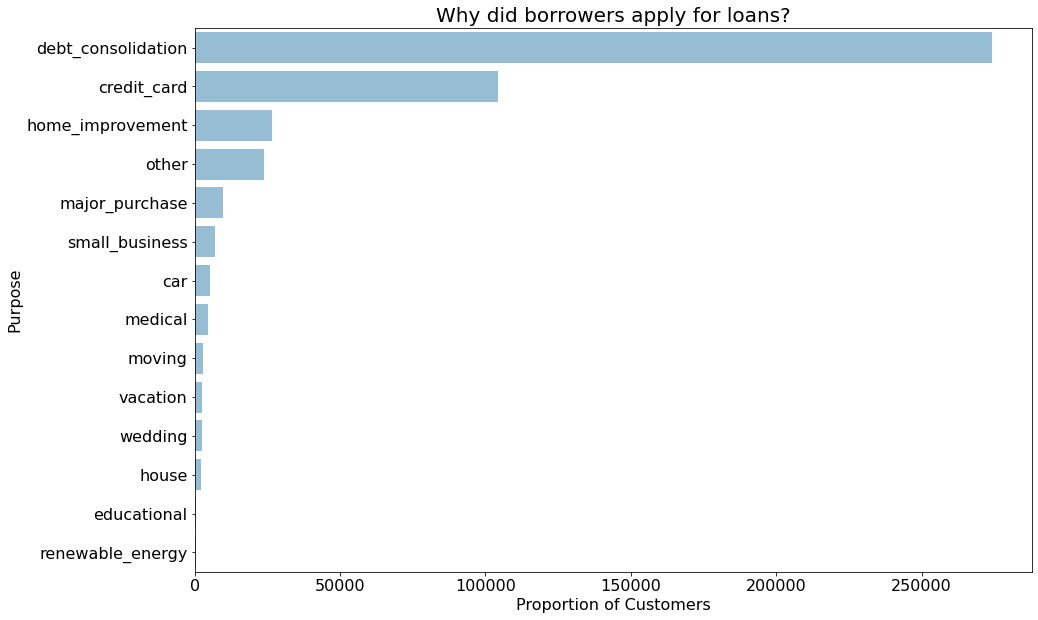

In [17]:
order = df['purpose'].value_counts(ascending=False).index
plt.figure(figsize=(15,10))
ax = sns.countplot(y='purpose', data=df, orient='v', order=order, color='#8CC0DE')
plt.title('Why did borrowers apply for loans?', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_ylabel("Purpose",fontsize=16)
ax.set_xlabel("Proportion of Customers",fontsize=16)

Most borrowers apply for loans for the purpose
of debt consolidation

**How long has it been on credit since the initial application?**

Modify `the earliest_cr_line` from month-year format to calculate how much time has passed since that time. To do this, it is common to use reference date = today. However, because this dataset is a 2007-2014 dataset, it will be more relevant to use a reference date around 2017. In this example, I use 2017-12-01 as the reference date.

In [18]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [19]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [20]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [21]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

it can be seen that there is strange data, namely data that has a negative value

In [22]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


To overcome this, we can do further preprocessing if we want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since I know here that negative values mean old data (1900s), it still makes sense if I change these values to the largest value.

In [23]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [24]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

Text(0, 0.5, 'Proportion of Customers')

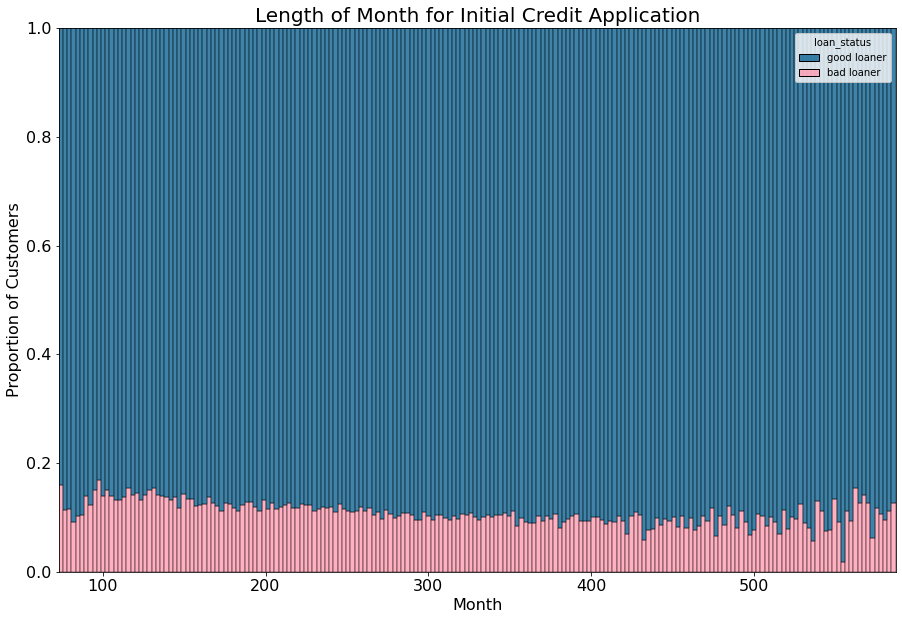

In [26]:
my_colors = ['#005A8D','#FF96AD']
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df, x="mths_since_earliest_cr_line", hue="loan_status",multiple="fill", palette=my_colors)
plt.title('Length of Month for Initial Credit Application', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Proportion of Customers",fontsize=16)

**how long the loan is funded?**

In [27]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [28]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [29]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

Text(0, 0.5, 'Proportion of Customers')

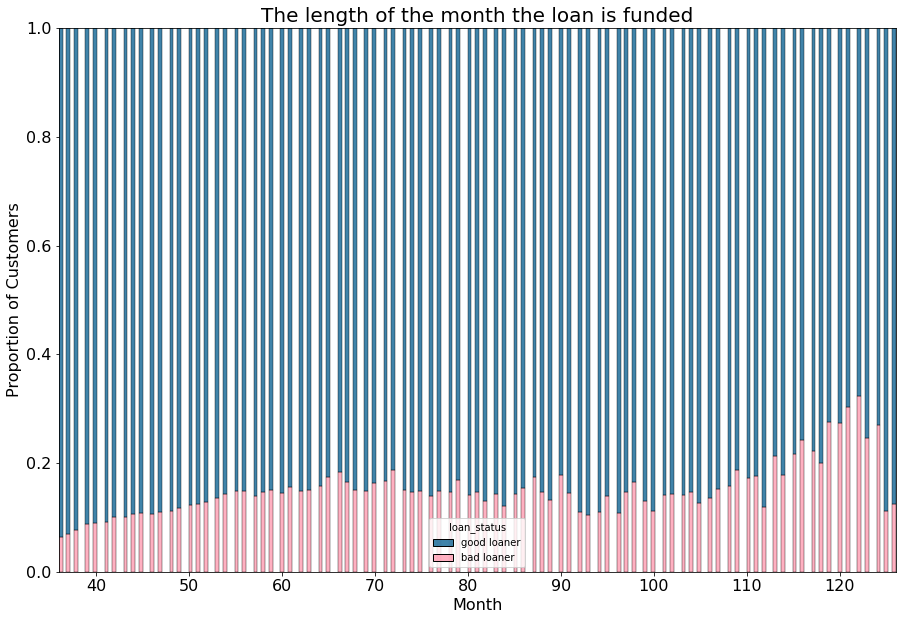

In [30]:
my_colors = ['#005A8D','#FF96AD']
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df, x="mths_since_issue_d", hue="loan_status",multiple="fill", palette=my_colors)
plt.title('The length of the month the loan is funded', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Proportion of Customers",fontsize=16)

**how many months payment received until december 2017?**

In [31]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [32]:
df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [33]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

Text(0, 0.5, 'Proportion of Customers')

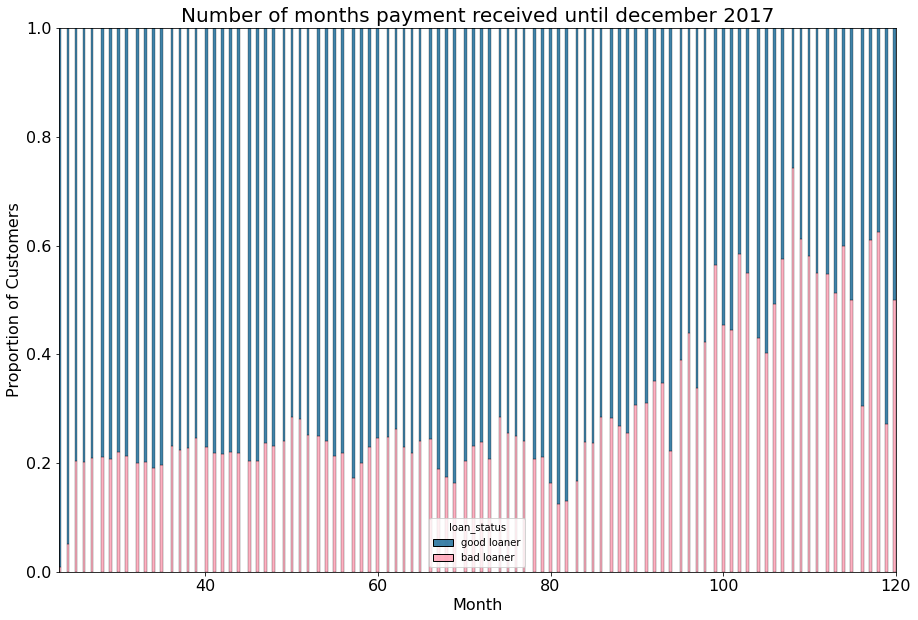

In [34]:
my_colors = ['#005A8D','#FF96AD']
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df, x="mths_since_last_pymnt_d", hue="loan_status",multiple="fill",palette=my_colors)
plt.title('Number of months payment received until december 2017', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Proportion of Customers",fontsize=16)

**how many months the last payment schedule until december 2017?**

In [35]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
df['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [37]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

Text(0, 0.5, 'Proportion of Customers')

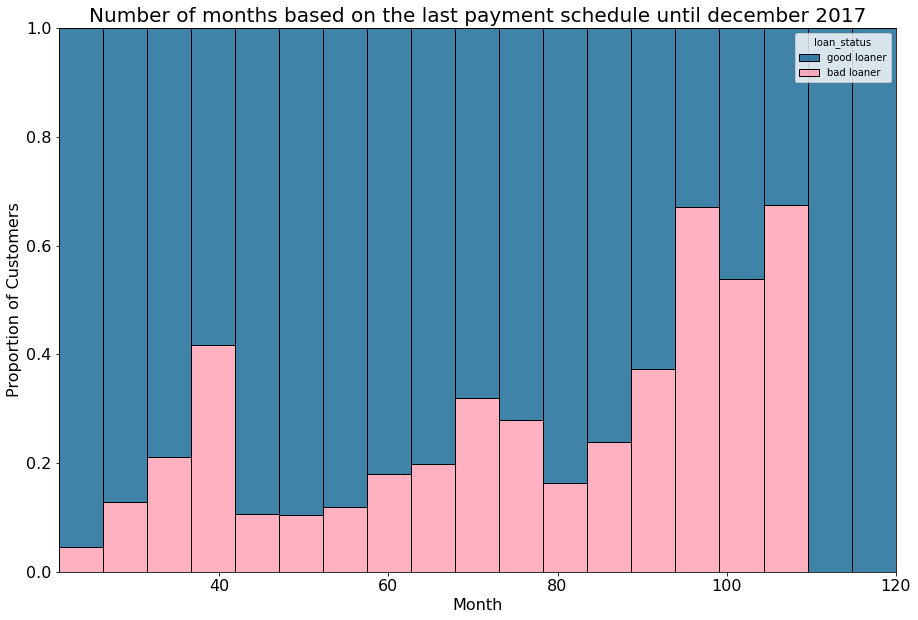

In [38]:
my_colors = ['#005A8D','#FF96AD']
plt.figure(figsize=(15,10))
ax = sns.histplot(data=df, x="mths_since_next_pymnt_d", hue="loan_status",multiple="fill",palette=my_colors)
plt.title('Number of months based on the last payment schedule until december 2017', fontsize=20)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Proportion of Customers",fontsize=16)

**last_credit_pull_d**

In [39]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [40]:
df['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [41]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

**How many have been verified?**

Text(0, 0.5, 'Proportion of Customers')

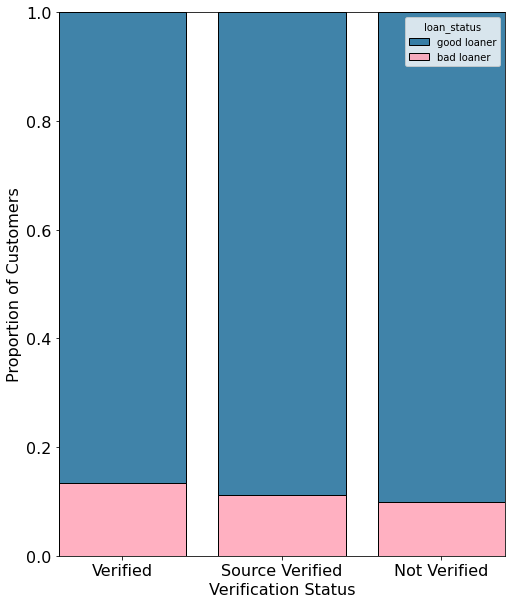

In [42]:
my_colors = ['#005A8D','#FF96AD']
plt.figure(figsize=(8,10))
ax = sns.histplot(data=df, x="verification_status", hue="loan_status",multiple="fill", shrink=.8, palette=my_colors)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_xlabel("Verification Status",fontsize=16)
ax.set_ylabel("Proportion of Customers",fontsize=16)

**Loan status by term**

Text(0, 0.5, 'Proportion of Customers')

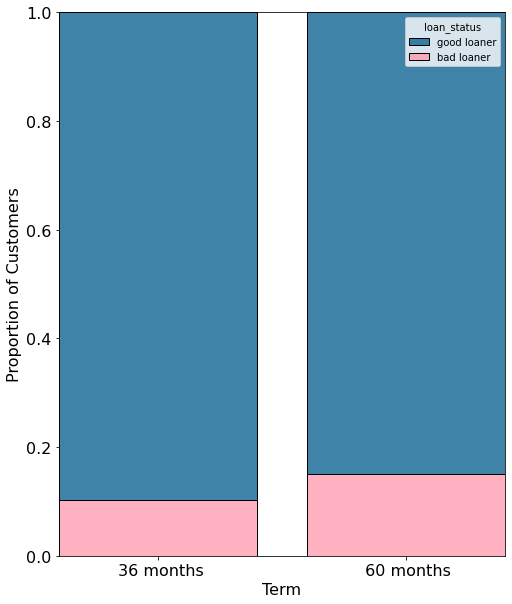

In [43]:
my_colors = ['#005A8D','#FF96AD']
plt.figure(figsize=(8,10))
ax = sns.histplot(data=df, x="term", hue="loan_status",multiple="fill", shrink=.8, palette=my_colors)
plt.yticks(size=16)
plt.xticks(size=16)
ax.set_xlabel("Term",fontsize=16)
ax.set_ylabel("Proportion of Customers",fontsize=16)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.000000,31.000000,49.00000,1.880000e+02


Okey, now we have features but what does they mean or actually how much do we need to know about these features The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. Therefore do we need do some data preparation such as data cleaning, feature selection, feature engineering, scaling or classification? The answer is yes and no not surprising :) Anyway lets go step by step and start with data preparation.

# EXPLORATORY DATA ANALYSIS

## Correlation Check

In [45]:
list_categoric = df[['emp_title', 'url', 'application_type']]
x = df.drop(list_categoric,axis = 1 )
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,263.0,72.0,23.0,22.0,23.0


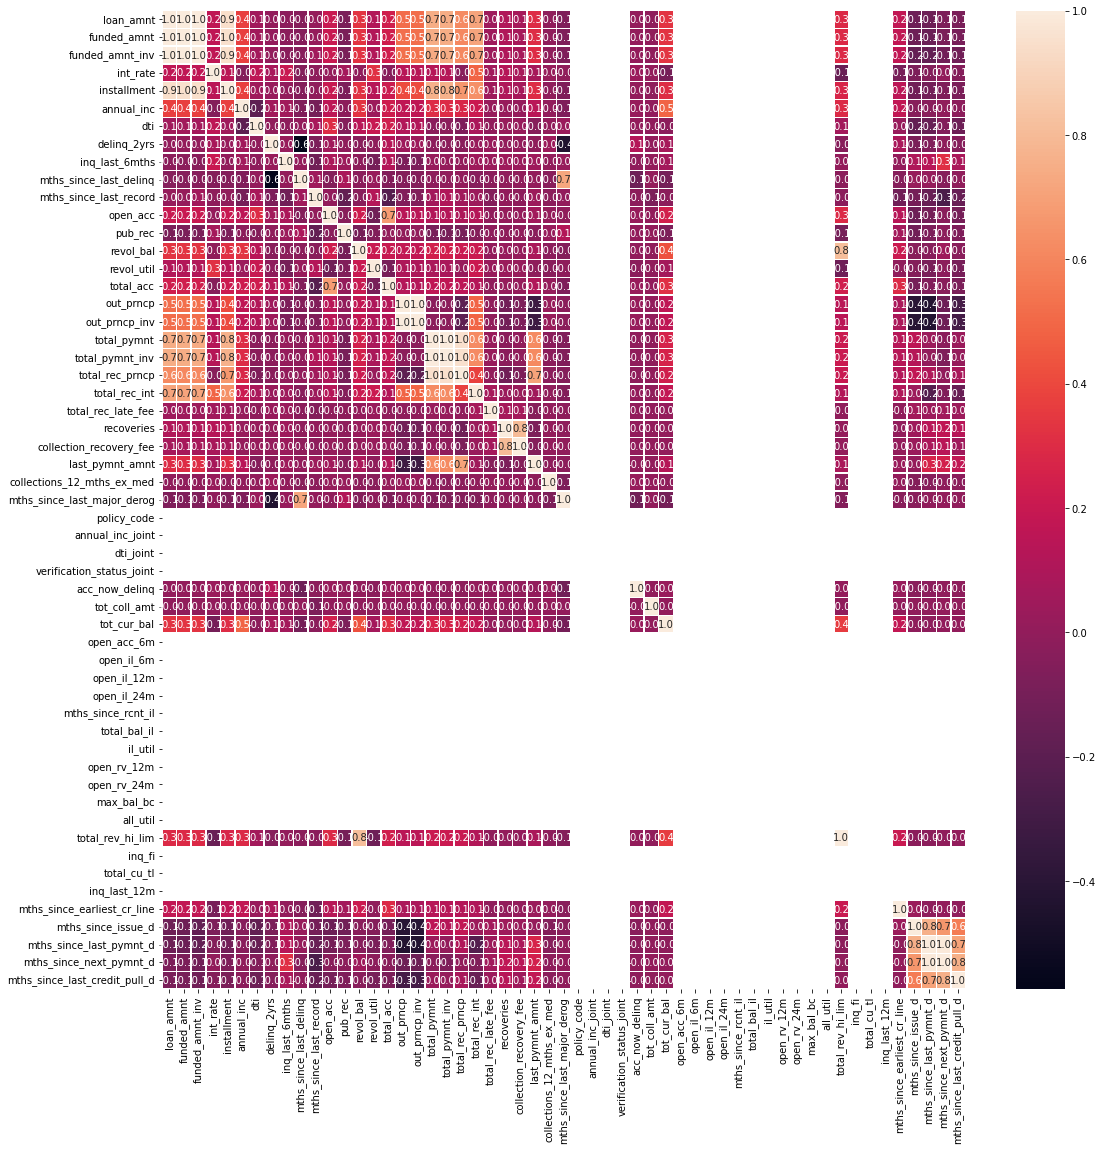

In [46]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Here, if there are pairs of features that have a high correlation, only one will be taken. The correlation value that is used as a benchmark as a high correlation is uncertain, generally the number 0.7 is used. In addition, there are lots of features that all intend to have a null value, so they will be removed.

In [47]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [48]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [49]:
df.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [50]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
loan_status                 2
pymnt_plan                  2
url                    466285
desc                   124436
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

from that information, we need to delete `url`,`emp_title`, `desc`, and `title` because it has a high cardinality. And also we need to drop `application_type` because it has only 1 unique number. And dont forget to drop `zip_code` because it contain free text.

In [51]:
df.drop(['url','emp_title','desc', 'title', 'zip_code', 'application_type'], inplace=True, axis=1 )

## Missing value

Let see, whether there is a missing value or not

In [52]:
missing_values = df.isnull().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)
missing_values

open_rv_12m                    1.000000
mths_since_rcnt_il             1.000000
open_il_12m                    1.000000
open_il_6m                     1.000000
open_acc_6m                    1.000000
total_bal_il                   1.000000
il_util                        1.000000
verification_status_joint      1.000000
dti_joint                      1.000000
annual_inc_joint               1.000000
open_il_24m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
mths_since_last_record         0.865666
mths_since_last_delinq         0.536906
tot_coll_amt                   0.150715
tot_cur_bal                    0.150715
emp_length                     0.045054
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
acc_now_delinq                 0.000062


In [53]:
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Features']=missing_values.index

In [54]:
missing_values.head()

,count,Features
Name,,
open_rv_12m,1.0,open_rv_12m
mths_since_rcnt_il,1.0,mths_since_rcnt_il
open_il_12m,1.0,open_il_12m
open_il_6m,1.0,open_il_6m
open_acc_6m,1.0,open_acc_6m


Text(0.5, 0, 'Counts')

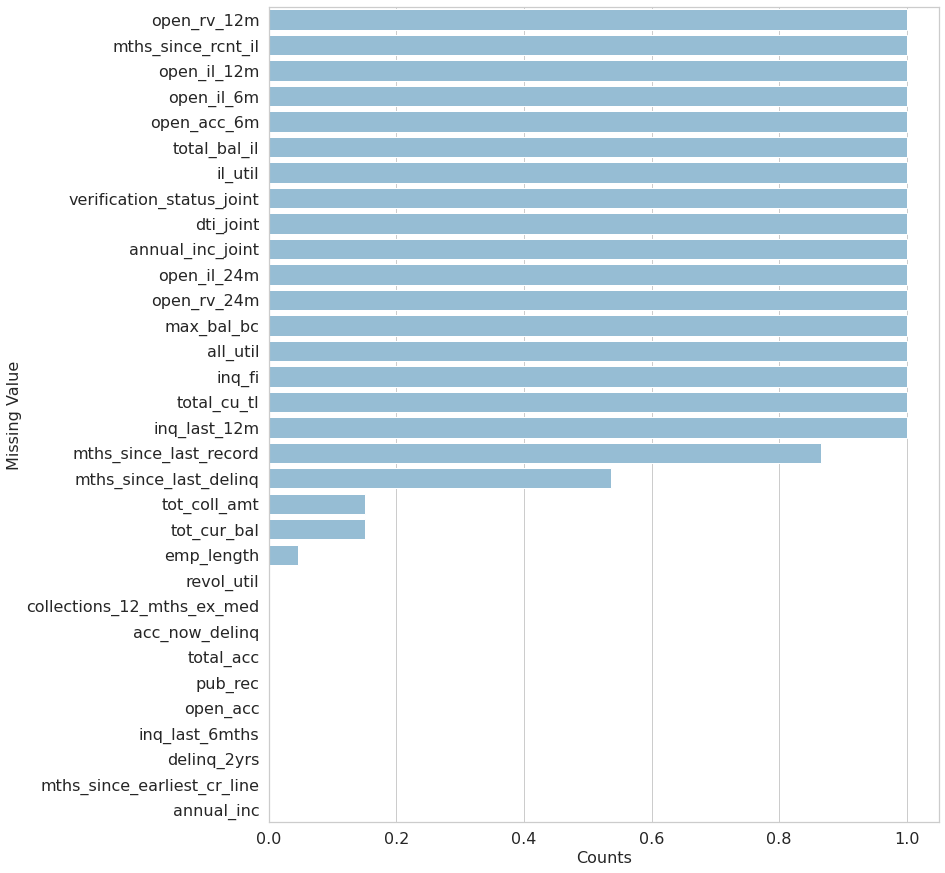

In [55]:
plt.figure(figsize=(12,15))
ax = sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(y = 'Features', x = 'count', data=missing_values, color='#8CC0DE')
plt.xticks(size=16)
plt.yticks(size=16)
ax.set_ylabel("Missing Value",fontsize=16)
ax.set_xlabel("Counts",fontsize=16)
#plt.savefig('miss_val.png')

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation) with mean or mode. Another option would be to drop columns with a high percentage of missing values.

In [56]:
cols_to_drop = [
       'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'mths_since_last_record'
]

In [57]:
df.drop(cols_to_drop, inplace = True, axis=1)

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'mths_since_earliest_cr_line',
       'mths_since_issue_d'],
      dtype='object')

Let's now look at the number of unique entries in each of columns.

In [59]:
df.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [60]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

loan_amnt       1352
revol_bal      58142
policy_code        1
dtype: int64

from that information, we need to delete policy_code feature because it has only 1 unique number.

In [61]:
df.drop(['policy_code'], inplace=True, axis=1)

In [62]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
loan_status             2
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
dtype: int64

we need to drop `sub_grade` because it expert judgement

In [63]:
df.drop(['sub_grade'], inplace=True, axis=1)

In [64]:
df.drop(['mths_since_last_delinq'], inplace=True, axis=1)

In [65]:
df.drop(['addr_state'], inplace=True, axis=1)

## Handling missing value

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'mths_since_earliest_cr_line', 'mths_since_issue_d'],
      dtype='object')

In [67]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
df['tot_cur_bal'].fillna(value=math.floor(df['tot_cur_bal'].mean()), inplace=True)
df['tot_coll_amt'].fillna(value=math.ceil(df['tot_coll_amt'].mean()), inplace=True)
df['revol_util'].fillna(value=math.floor(df['revol_util'].mean()), inplace=True)
df['collections_12_mths_ex_med'].fillna(value=math.floor(df['collections_12_mths_ex_med'].mean()), inplace=True)                                     
df['open_acc'].fillna(value=math.floor(df.open_acc.mean()), inplace=True)
df['total_acc'].fillna(value=math.floor(df.total_acc.mean()), inplace=True)
df['inq_last_6mths'].fillna(value=math.floor(df.inq_last_6mths.mean()), inplace=True)
df['delinq_2yrs'].fillna(value=math.floor(df.delinq_2yrs.mean()), inplace=True)
df['pub_rec'].fillna(value=math.floor(df.pub_rec.mean()), inplace=True)
df['annual_inc'].fillna(value=df.annual_inc.mean(), inplace=True)
df['acc_now_delinq'].fillna(value=math.floor(df.acc_now_delinq.mean()), inplace=True)

In [68]:
df.isnull().sum()

loan_amnt                       0
term                            0
int_rate                        0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
pymnt_plan                      0
purpose                         0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
out_prncp                       0
total_rec_late_fee              0
recoveries                      0
collections_12_mths_ex_med      0
acc_now_delinq                  0
tot_coll_amt                    0
tot_cur_bal                     0
mths_since_earliest_cr_line    29
mths_since_issue_d              0
dtype: int64

In [69]:
df.drop(['mths_since_earliest_cr_line'], inplace=True, axis=1)

# ENCODE

In [70]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()if col not in ['bad_flag']]

In [71]:
categorical_cols

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status']

In [72]:
label_encoder = LabelEncoder()

In [73]:
df.loan_status.value_counts()

good loaner    412171
bad loaner      54114
Name: loan_status, dtype: int64

In [74]:
df['loan_status']= label_encoder.fit_transform(df['loan_status'])
df['loan_status'].unique()

array([1, 0])

In [75]:
df['term']= label_encoder.fit_transform(df['term'])
df['grade']= label_encoder.fit_transform(df['grade'])
df.loc[df['emp_length'] == '< 1 year', 'emp_length'] = 0
df.loc[df['emp_length'] == '1 year', 'emp_length'] = 1
df.loc[df['emp_length'] == '2 years', 'emp_length'] = 1 
df.loc[df['emp_length'] == '3 years', 'emp_length'] = 1
df.loc[df['emp_length'] == '4 years' , 'emp_length'] =2
df.loc[df['emp_length'] == '5 years' , 'emp_length'] =2
df.loc[df['emp_length'] == '6 years', 'emp_length'] = 2
df.loc[df['emp_length'] == '7 years' , 'emp_length'] = 3
df.loc[df['emp_length'] == '8 years' , 'emp_length'] =3
df.loc[df['emp_length'] == '9 years', 'emp_length'] = 3
df.loc[df['emp_length'] == '10+ years', 'emp_length'] = 4
df['home_ownership']= label_encoder.fit_transform(df['home_ownership'])
df['verification_status']= label_encoder.fit_transform(df['verification_status'])
df['pymnt_plan']= label_encoder.fit_transform(df['pymnt_plan'])
df['purpose']= label_encoder.fit_transform(df['purpose'])
df['initial_list_status']= label_encoder.fit_transform(df['initial_list_status'])

In [76]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
mths_since_issue_d            0
dtype: int64

# MODELING

## Spliting Data

In [77]:
X = df.drop(columns="loan_status")
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 27), (93257, 27), (373028,), (93257,))

In [78]:
df.loan_status.value_counts()

1    412171
0     54114
Name: loan_status, dtype: int64

In [79]:
df.select_dtypes('object').isnull().sum()

emp_length    0
dtype: int64

## Scaling

In [80]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_train_scaled.shape

(373028, 27)

In [81]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,373028.0,0.193160,0.690750,-0.958333,-0.333333,0.0,0.666667,1.916667
term,373028.0,0.275095,0.446563,0.000000,0.000000,0.0,1.000000,1.000000
int_rate,373028.0,0.031090,0.791904,-1.498182,-0.485455,0.0,0.514545,2.254545
grade,373028.0,-0.091485,0.659835,-1.000000,-0.500000,0.0,0.500000,2.000000
emp_length,373028.0,-0.169794,0.461177,-1.000000,-0.666667,0.0,0.333333,0.333333
home_ownership,373028.0,0.472023,0.481919,-0.250000,0.000000,0.0,1.000000,1.000000
annual_inc,373028.0,0.246128,1.225344,-1.393609,-0.402713,0.0,0.597287,162.741609
verification_status,373028.0,0.021216,0.411240,-0.500000,-0.500000,0.0,0.500000,0.500000
pymnt_plan,373028.0,0.000019,0.004332,0.000000,0.000000,0.0,0.000000,1.000000
purpose,373028.0,0.658859,2.410506,-2.000000,0.000000,0.0,0.000000,11.000000


## SMOTE for imbalance data

In [82]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled_df, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 329737
Before OverSampling, counts of label '0': 43291 

After OverSampling, the shape of train_X: (659474, 27)
After OverSampling, the shape of train_y: (659474,) 

After OverSampling, counts of label '1': 329737
After OverSampling, counts of label '0': 329737


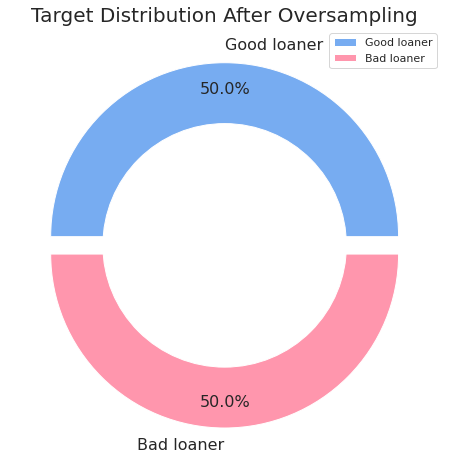

In [83]:
gl = sum(y_train_res==1)
bl = sum(y_train_res==0)
sizes = [gl, bl]
  
# Setting labels for items in Chart
labels = ['Good loaner','Bad loaner']
  
# colors
colors = ['#77ACF1','#FF96AD']
  
# explosion
explode = (0.05, 0.05)

plt.figure(figsize=(12,8))  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode, textprops={'fontsize': 16})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Target Distribution After Oversampling', fontsize=20)
  
# Add Legends
plt.legend(labels, loc="upper right")
  
# Displaying Chart
plt.show()

## Model development

In [86]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train_res, y_train_res)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_train_res, y_train_res) * 100, 2)
f1_lr = f1_score(y_test, Y_pred, average='micro')
cv_lr = cross_val_score(lr, X_test, y_test, cv=3).mean()
acc_lr

76.74

In [87]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_res, y_train_res)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train_res, y_train_res) * 100, 2)
f1_gaussian = f1_score(y_test, Y_pred, average='micro')
cv_gaussian = cross_val_score(gaussian, X_test, y_test, cv=3).mean()
acc_gaussian

74.24

In [88]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train_res, y_train_res)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train_res, y_train_res) * 100, 2)
f1_perceptron = f1_score(y_test, Y_pred, average='micro')
cv_perceptron = cross_val_score(perceptron, X_test, y_test, cv=3).mean()
acc_perceptron

67.44

In [92]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_res, y_train_res)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train_res, y_train_res) * 100, 2)
f1_linear_svc = f1_score(y_test, Y_pred, average='micro')
cv_linear_svc = cross_val_score(linear_svc, X_test, y_test, cv=3).mean()
acc_linear_svc

76.64

In [89]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train_res, y_train_res)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train_res, y_train_res) * 100, 2)
f1_sgd = f1_score(y_test, Y_pred, average='micro')
cv_sgd = cross_val_score(sgd, X_test, y_test, cv=3).mean()
acc_sgd

75.24

In [98]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train_res, y_train_res)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train_res, y_train_res) * 100, 2)
f1_decision_tree = f1_score(y_test, Y_pred, average='micro')
cv_decision_tree = cross_val_score(decision_tree, X_test, y_test, cv=3).mean()
acc_decision_tree

76.49

In [97]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train_res, y_train_res)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train_res, y_train_res) * 100, 2)
f1_random_forest = f1_score(y_test, Y_pred, average='micro')
cv_random_forest = cross_val_score(random_forest, X_test, y_test, cv=3).mean()
acc_random_forest

80.36

# Model Evaluation

In [99]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 
              'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_lr,acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
    'f1': [f1_lr, f1_random_forest, f1_gaussian, f1_perceptron, 
              f1_sgd, f1_linear_svc, f1_decision_tree],
    'cv': [cv_lr, cv_random_forest, cv_gaussian, cv_perceptron, 
              cv_sgd, cv_linear_svc, cv_decision_tree]})
evaluation = models.sort_values(by=['Score','f1','cv'], ascending=False)

In [100]:
evaluation

,Model,Score,f1,cv
1,Random Forest,80.36,0.834650,0.936101
0,Logistic Regression,76.74,0.883966,0.936069
5,Linear SVC,76.64,0.899879,0.925014
6,Decision Tree,76.49,0.267605,0.936562
4,Stochastic Gradient Decent,75.24,0.920789,0.919566
2,Naive Bayes,74.24,0.889939,0.930311
3,Perceptron,67.44,0.829503,0.873361


# VALIDATION

In [101]:
y_pred_proba = random_forest.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

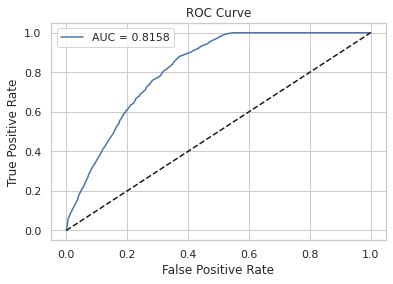

In [102]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Conclusion

* Best model: Random Forest with 3-folds cross validation
* The test was carried out using the AUC metric with a random forest model. The resulting AUC score is 0.82, which includes good performance in credit risk modeling.
* We should pay more attention to borrowers who meet the criteria :
    * earlier issue date 
    * loan application within 36 months
